<a href="https://colab.research.google.com/github/karishmasd/Neural_Networks/blob/main/Planar_data_classification_with_1_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GOAL**:

*   Implementing a 2-class classification neural network with a single hidden layer
*   Use units with a non-linear activation function, such as tanh
*   Compute the cross entropy loss
*   Implement forward and backward propagation


In [145]:
import numpy as np                # for scientific calculation
import sklearn                    # for data mining and data analysis
import matplotlib.pyplot as plt   # for visualization
import copy

%matplotlib inline
# for in notebook dispay

for data set

In [146]:
def planar_flower_dataset():
    np.random.seed(100)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


loading the data set

In [147]:
X,Y =planar_flower_dataset()
#print(X,Y)

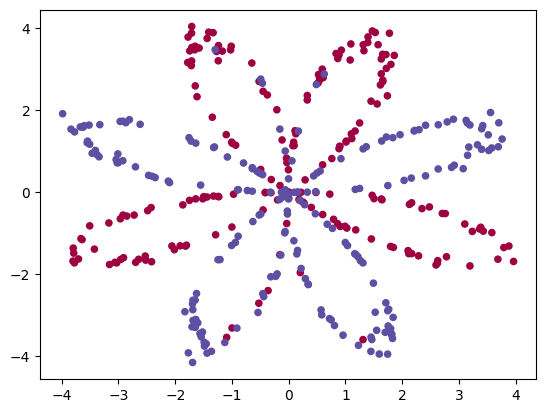

In [148]:
plt.scatter(X[0,:],X[1,:],c=Y,s=20,cmap=plt.cm.Spectral);

plt.scatter(): Creates a scatter plot with customizable positions, colors, and sizes.


X[0, :]: X-coordinates (first row of X).


X[1, :]: Y-coordinates (second row of X).


c=Y: Colors points based on Y values.


s=40: Marker size set to 40.


cmap=plt.cm.Spectral: Uses the "Spectral" colormap for distinct colors.


In [149]:
m=np.shape(X)[1]
m

400

In [150]:
shape_X=np.shape(X)
shape_Y=np.shape(Y)
print(shape_X,shape_Y)

(2, 400) (1, 400)


#**Simple logistic regression**

we can use sklearn's  inbuilt function

In [151]:
lr=sklearn.linear_model.LogisticRegression();
lr.fit(X.T,Y.T.ravel());
#sklearn logistic regression expects the y to be in the form of (400,) our y is Y.T that is (400,1) so we use ravel() to transform

#**function to plot decision boundary**

In [167]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'Logistic Regression')

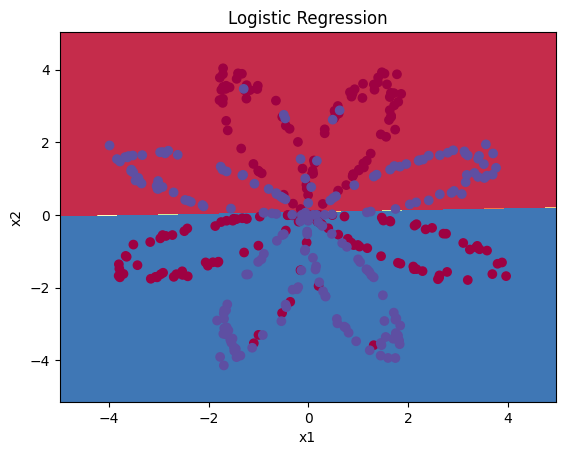

In [168]:
plot_decision_boundary(lambda x: lr.predict(x), X, Y)
plt.title("Logistic Regression")

In [154]:
LR_predictions = lr.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 48 % (percentage of correctly labelled datapoints)


<ipython-input-154-0fa869128920>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


#**Data Classification with 1 hidden layer**
The dataset is not linearly separable,
Logistic Regression doesnt work well with flower dataset as we can see our accuracy is 48%
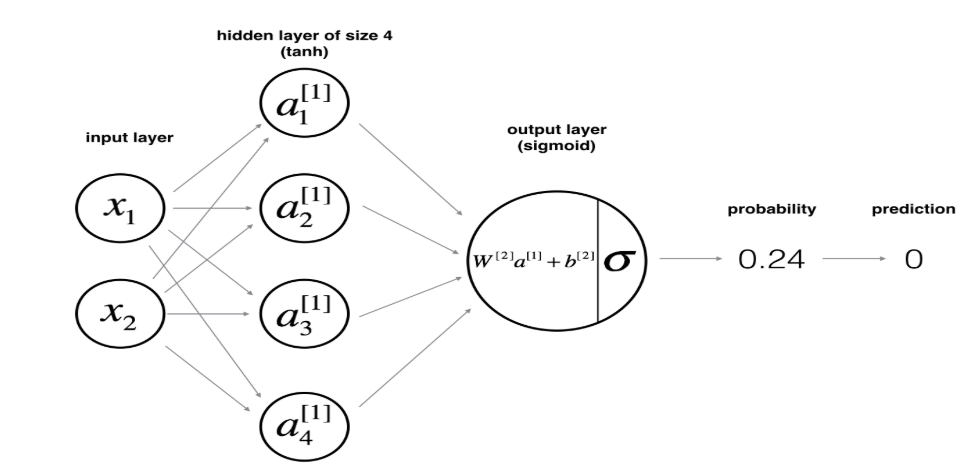


*   n_x: the size of the input layer


*   n_h: the size of the hidden layer (set this to 4, as n_h = 4)

*   n_y: the size of the output layer




In [155]:
def layer_sizes(X,Y):
    n_x= np.shape(X)[0]
    n_h=4
    n_y=np.shape(Y)[0]
    return (n_x,n_h,n_y)

#**Intialize  parameters**
intialize the weights with min values not zeroes and b's with 0

In [156]:
def initialize(n_x,n_h,n_y):
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
  return parameters



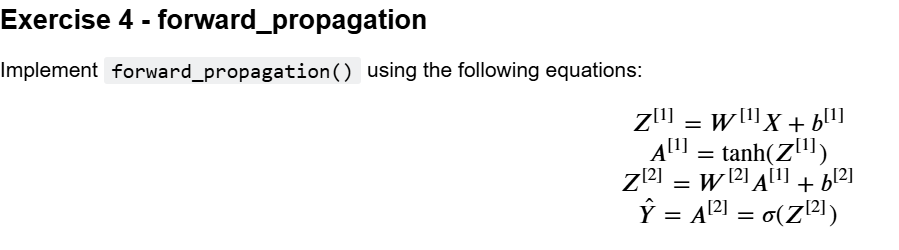

In [157]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [158]:
#def tanh(z):
  #result=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
  #return result

In [159]:
def forward_propagation(parameters,X):
  W1=parameters["W1"]
  W2=parameters["W2"]
  b1=parameters["b1"]
  b2=parameters["b2"]
  Z1=np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
  return A2, cache

#**Compute the cost**

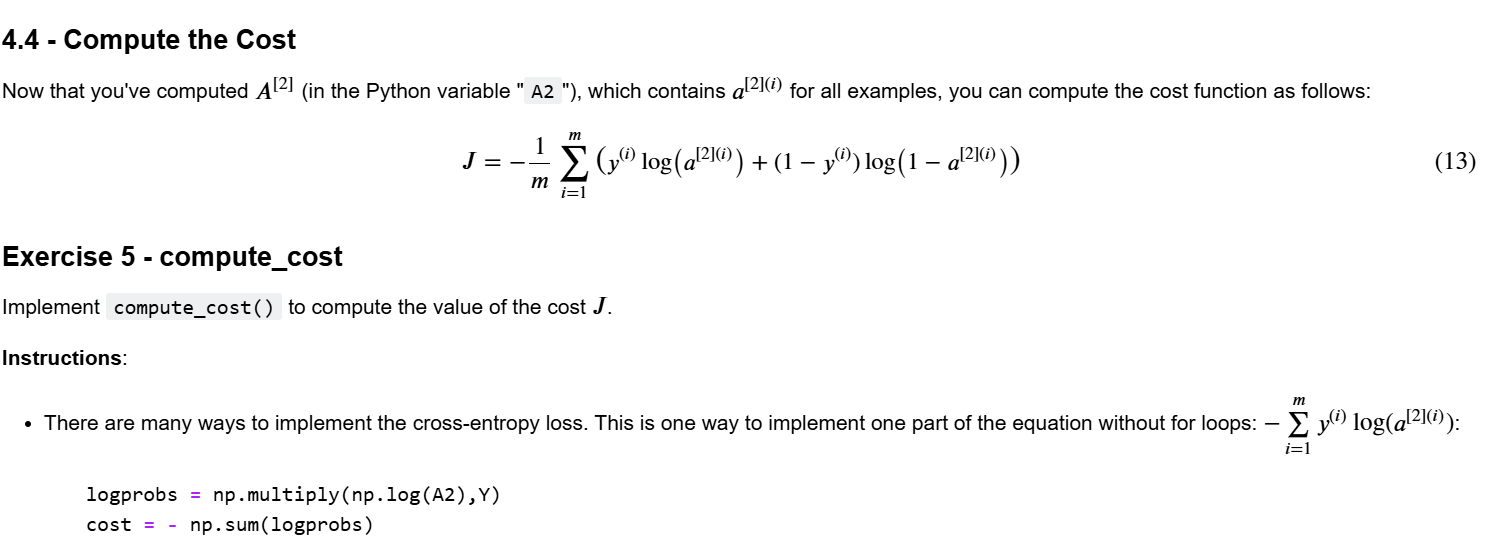


In [160]:
def compute_cost(A2,X,Y):
  m=Y.shape[1]
  logprobs=(np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2)))
  cost= -(1/m)*np.sum(logprobs)
  cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
  return cost

#**Implement backpropogation**
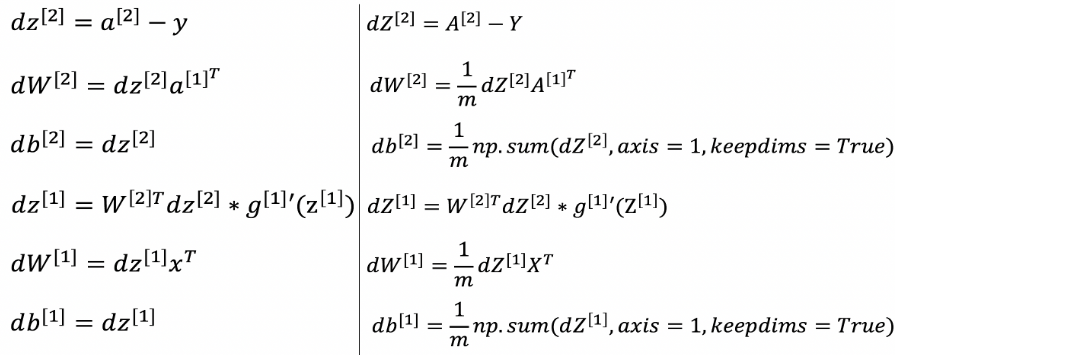

In [161]:
  def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    dZ2=A2-Y
    dW2=(1/m)* np.dot(dZ2,A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1=(1/m)*np.dot(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}

    return grads

#**Update Prameters with gradient descent**
  𝜃=𝜃−𝛼*(∂𝐽/∂𝜃)

  
  where  𝛼
  is the learning rate and  𝜃
  represents a parameter.

In [162]:
def update_parameters(parameters,grads,learning_rate=1.2):
    W1=copy.deepcopy(parameters["W1"])
    W2=copy.deepcopy(parameters["W2"])
    b1=copy.deepcopy(parameters["b1"])
    b2=copy.deepcopy(parameters["b2"])
    dW1=copy.deepcopy(grads["dW1"])
    dW2=copy.deepcopy(grads["dW2"])
    db1=copy.deepcopy(grads["db1"])
    db2=copy.deepcopy(grads["db2"])
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters


#**Integration (NN model)**

In [163]:
def nn_model(X,Y,n_h=4,number_iterations=8000,print_cost=False) :
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    parameters=initialize(n_x,n_h,n_y)
    for i in range(0,number_iterations):
      A2, cache= forward_propagation(parameters,X)
      cost=compute_cost(A2,X,Y)
      grads=backward_propagation(parameters,cache,X,Y)
      parameters=update_parameters(parameters,grads,learning_rate=0.05)
      if print_cost and i % 1000 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
    return parameters



#**Testing the model**
Predict with your model by building predict(). Use forward propagation to predict results.

The prediction is based on whether the neural network's output signal is strong enough (above 0.5) to be considered a "yes" for one class or if it's weaker (below or equal to 0.5) and therefore a "no" for that class, resulting in a prediction for the other class.


In [164]:
def predict(parameters,X):
  A2, cache = forward_propagation(parameters,X)
  prediction = (A2>0.5)
  return prediction

Cost after iteration 0: 0.693169
Cost after iteration 1000: 0.607610
Cost after iteration 2000: 0.574296
Cost after iteration 3000: 0.565491
Cost after iteration 4000: 0.558523
Cost after iteration 5000: 0.367111
Cost after iteration 6000: 0.300798
Cost after iteration 7000: 0.278455


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

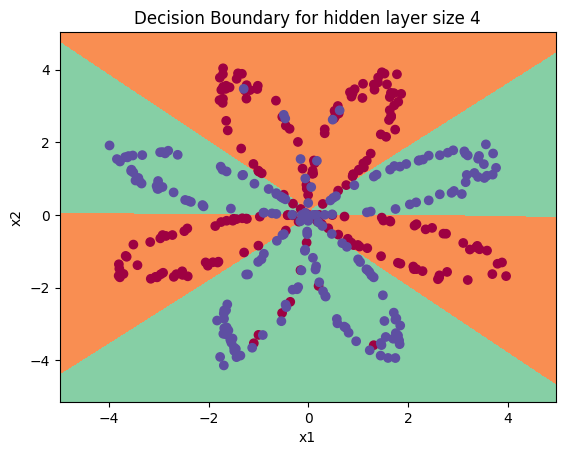

In [173]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X,Y,n_h=4,number_iterations=8000,print_cost=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [174]:
prediction = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, prediction.T) + np.dot(1 - Y, 1 - prediction.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%


<ipython-input-174-d2e8549ce974>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, prediction.T) + np.dot(1 - Y, 1 - prediction.T)) / float(Y.size) * 100) + '%')
